# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

df = pd.read_csv('/Users/jason/svn/springboard/human_temp/data/human_body_temperature.csv')

## I. Is the body temperature data normally distributed?
1. Kernel Density plot
2. Probability plot

### 1. Kernel Density plot

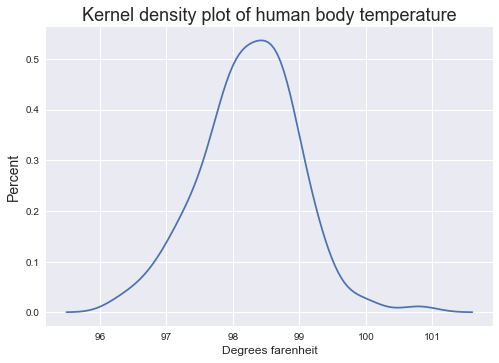

In [101]:
# Draw kernel density plot
sns.kdeplot(df.temperature)
plt.legend('')
plt.title('Kernel density plot of human body temperature', {"fontsize": 18})
plt.xlabel('Degrees farenheit', {"fontsize": 12})
plt.ylabel('Percent',{"fontsize": 14})
plt.show()

### Discussion
Our kernel density plot is unimodal and seems to be roughly bell shaped. The distribution is not exactly symmetric, but given the sample size, it seems reasonably close to symmetric. No reason to reject normality so far.

### 2. Probability  Plot

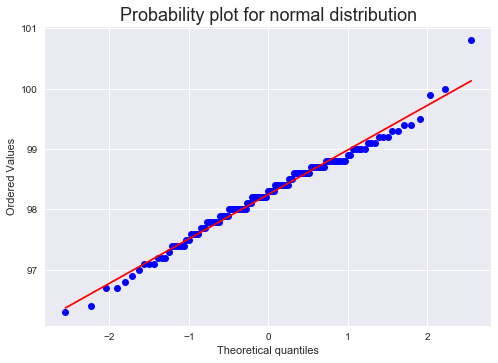

In [97]:
# Create probability plot for normal distribution with standard
# deviation equal to the standard deviation of our sample
sd = np.std(df.temperature)
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df.temperature,plot=ax, dist=stats.norm)
ax.set_title("Probability plot for normal distribution", {"fontsize": 18})
plt.show()

### Discussion
The probability plot does not indicate a significant departure from the normal distribution.

## II. Is the sample size large? Are the observations independent?

From the descriptive statistics, we can see there are 130 observations. I do not have any information about how the data was collected, so I do not know if the observations are independent.

In [282]:
# Take a quick peek at some of the data
# to get oriented
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


## III. Is the true population mean 98.6 degrees farenheit?

Since 98.6 degrees is the commonly accepted average body temperature for humans, we will say that the null hypothesis,  $H_0$, is that the human body temperature is 98.6 degrees and the alternative hypothesis, $H_1$, is that average human body temperature is either above or below 98.6 degrees. Since we are assessing whether the temperature is above or below, for single population, we will use a two-tailed, one-sample test.

In [127]:
# Choose your preferred significance level
# For this example, we use 5%
sig_level = 0.05

# Our best estimate of the population mean and standard deviation, 
# based on our data are the sample mean and sample standard deviation
mu_hat = np.mean(df.temperature)
sigma_hat = np.std(df.temperature)

delta = mu_hat - 98.6
z_score = delta / sigma_hat
print("98.6 degrees is within " + str(np.round(np.abs(z_score),2)) + " standard deviations of our sample mean")

# Critical value for z-statistic
crit_val_normal = stats.norm.interval(1 - sig_level)

#Since the distribution is symmetric, we can get away with only looking at one side
if np.abs(z_score) < crit_val_normal[1]:
    print("Since z-score for 98.6 degrees is inside our critical region of: " + str(np.round(crit_val_normal,2)))
    print("    we cannot reject the null hypothesis that body temperature is 98.6 degrees at the 0.05 level")

98.6 degrees is within 0.48 standard deviations of our sample mean
Since z-score for 98.6 degrees is inside our critical region of: [-1.96  1.96]
    we cannot reject the null hypothesis that body temperature is 98.6 degrees at the 0.05 level


### Is t-statistic significantly different than z-score?

In [194]:
deg_freedom = len(df.temperature) - 1
t_stat = [stats.t.interval(1 - sig_level, deg_freedom)]
print("The critical region for the t-score at the 0.05 significange level is: " + str(np.round(t_stat,2)))
print("The 95% confidence interval for the t-statistic extends from " + str(np.array(t_stat) * sigma_hat + mu_hat))
print("The 95% confidence interval for the z-score     extends from " + str(np.array(crit_val_normal) * sigma_hat + mu_hat))

The critical region for the t-score at the 0.05 significange level is: [[-1.98  1.98]]
The 95% confidence interval for the t-statistic extends from [[ 96.80420002  99.69426152]]
The 95% confidence interval for the z-score     extends from [ 96.81775583  99.68070571]


### Answer:
While the 95% confidence region when using the t-statistic is not identical to that of the z-score, it is not meaningfully different for this data. This is what we would expect since the student-t distribution becomes approximately normal as the degrees of freedom increases. Beyond 30 observations, we are generally safe to use the z-score. In this particular case with 130 observations, we can see that it makes little difference.

### IV. At what point should we consider a person's temperature abnormal?

Our data does not allow us to answer this question in terms of whether or the temperature indicates any pathology or condition, but rather is the observed temperature likely from a randomly sampled individual. So the first thing we need to do is to define likely and abnormal in terms of the likelihood of seeing a particular temperature or one that is more extreme. It is common to define unlikely as either less than 1/20 chance or less than 1/100. We will give both ranges.

In [237]:
def probable_temp_range(mu_hat, sigma_hat, alpha):
    crit_val_normal = stats.norm.interval(1 - alpha)
    temp_range = mu_hat + sigma_hat * np.array(crit_val_normal)
    print("The cumulative probability of observing a temperature outside of the range: " + str(np.round(temp_range,2)))
    print("    is approximately " + str(alpha * 100) + "%")

print(probable_temp_range(mu_hat, sigma_hat, 0.05))
print(probable_temp_range(mu_hat, sigma_hat, 0.01))

The cumulative probability of observing a temperature outside of the range: [ 96.82  99.68]
    is approximately 5.0%
None
The cumulative probability of observing a temperature outside of the range: [  96.37  100.13]
    is approximately 1.0%
None


### Answer

It would be reasonable to conclude that human body temperature is abnormal if it is outside of the ranges listed above. Either range would be reasonable choice, so we will let the reader choose.

### Sanity check
If our confidence intervals are correct, we would expect to find that approximately 5% of our data is more extreme than our 95% confidence interval and approximately 1% of our data is more extremem than the 99% confidence interval.

In [242]:
print(str(np.round(np.mean((df.temperature < 96.82) | (df.temperature > 99.68)),3)) + " percent are outside the 95% CI")
print(str(np.round(np.mean((df.temperature < 96.37) | (df.temperature > 100.13)),3)) + " percent are outside the 99% CI")

0.062 percent are outside the 95% CI
0.015 percent are outside the 99% CI


Given the size of our data, the percentages above seem consistent with our calculated confidence intervals.

### V. Is there a difference between the temperatures of males and females?

$H_0$: The mean body temperature between men and women is the same
$H_1$: There is a difference between the body temperatures of men and women

#### a) Visualize distribution of male and female body temperatures

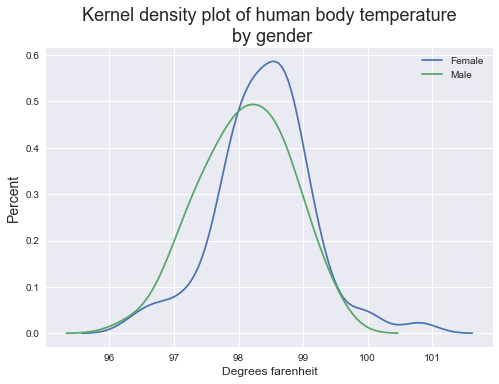

In [248]:
sns.kdeplot(df.temperature[df.gender == 'F'])
sns.kdeplot(df.temperature[df.gender == 'M'])

plt.legend(['Female', 'Male'])
plt.title('Kernel density plot of human body temperature\n by gender', {"fontsize": 18})
plt.xlabel('Degrees farenheit', {"fontsize": 12})
plt.ylabel('Percent',{"fontsize": 14})

plt.show()

#### b) What do the 95% confidence intervals for the mean of body temperature by sex look like?

In [280]:
# Create dataframe for each sex
df_female = df[df.gender == 'F']
df_male = df[df.gender == 'M']

# print 95% confidence interval for each group
probable_temp_range(np.mean(df_female.temperature), np.std(df_female.temperature), 0.05)
probable_temp_range(np.mean(df_male.temperature), np.std(df_male.temperature), 0.05)

The cumulative probability of observing a temperature outside of the range: [ 96.95  99.84]
    is approximately 5.0%
The cumulative probability of observing a temperature outside of the range: [ 96.75  99.46]
    is approximately 5.0%


The 95% confidence intervals shown above seem very close together, so it does not look very likely that there is a difference. Let's see what our formal hypothesis testing indicates.

#### c) Compute z-score and p-value for difference in means between men and women

In [279]:
pooled_sd = np.sqrt((np.var(df_female.heart_rate) / len(df_female.heart_rate)) + (np.var(df_male.heart_rate / len(df_male.heart_rate))))
z_score = (np.mean(df_male.heart_rate) - np.mean(df_female.heart_rate)) / pooled_sd
print("Our z is " + str(np.round(z_score,2)) + " corresponding to a p-value of: " + str(np.round(stats.norm.cdf(z_score),2)))

Our z is -0.78 corresponding to a p-value of: 0.22


The p-value, shown as 0.22 above, tells us the probability of finding a difference as extreme as we found when there is no difference between the populations. Since we would expect to find a difference this large or larger a little more than one out of every five times, we do not find this as strong evidence to reject the null hypothesis that the mean body temperature between men and women is the same. 